In [1]:
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import pickle

 
## "train_set"
 ##  מהתיקיה למערך 

In [3]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [4]:
directory = r'.\training_set'
categories = ['cats' , 'dogs']

In [5]:
IMGSIZE = 100

data = []

In [6]:
for category in categories:
    folder = os.path.join(directory , category )
    # יצירת לייבלים עבור התמונות - לחתולים המחשב יקרא 0 ולכלבים 1
    label = categories.index(category)
    print (folder)
    for img in os.listdir(folder):
        img_path = os.path.join(folder , img)
    # קריאת התמונות מהמחשב ויצירת מערך
        img_arr = cv2.imread(img_path)
    # שינוי התמונות לגודל אחיד 
        if img_arr is None:
            print('Wrong path:' , img_path)
        else:
            img_arr = cv2.resize(img_arr , (IMGSIZE , IMGSIZE ))
     #   הדאטה מכיל את התמונות ולגבי כל תמונה האם היא כלב או חתול , כלומר 1 או 0
        data.append([img_arr , label])
        
     

.\training_set\cats
Wrong path: .\training_set\cats\_DS_Store
.\training_set\dogs


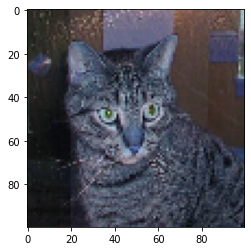

In [7]:
plt.imshow(data[0][0])

In [8]:
len(data)

8006

# "test_set"
 ##  מהתיקיה למערך 

In [17]:
test_directory = r'C:\Users\97258\archive\test_set\test_set'
categories = ['cats' , 'dogs']

In [18]:
test_data = []

In [19]:
for category in categories:
    folder = os.path.join(test_directory , category )
    # יצירת לייבלים עבור התמונות - לחתולים המחשב יקרא 0 ולכלבים 1
    label = categories.index(category)
    print (folder)
    for img in os.listdir(folder):
        img_path = os.path.join(folder , img)
    # קריאת התמונות מהמחשב ויצירת מערך
        img_arr = cv2.imread(img_path)
    # שינוי התמונות לגודל אחיד 
        if img_arr is None:
            print('Wrong path:' , img_path)
        else:
            img_arr = cv2.resize(img_arr , (IMGSIZE , IMGSIZE ))
     #   הדאטה מכיל את התמונות ולגבי כל תמונה האם היא כלב או חתול , כלומר 1 או 0
        test_data.append([img_arr , label])
        
     

C:\Users\97258\archive\test_set\test_set\cats
Wrong path: C:\Users\97258\archive\test_set\test_set\cats\_DS_Store
C:\Users\97258\archive\test_set\test_set\dogs
Wrong path: C:\Users\97258\archive\test_set\test_set\dogs\_DS_Store


In [20]:
len(test_data)

2025

# ערבוב הנתונים, היות וכעת הם מסודרים כך שהחתלים ראשונים ולאחריהם הכלבים

In [21]:
random.shuffle(data)
random.shuffle(test_data)


In [26]:
#data[10]

In [27]:
#data[20] 
#...בדקנו שאכן מעורבב

In [ ]:
# אנחנו צריכים שבמקום עומק 3 יהיה עומק 1 כלומר כל תמונה שתהפוך לווקטור אחד ארוך 

In [28]:
X =[]
Y =[]

for (features , labels) in data :
  
    print("type:" , type(features) )
    X.append(np.reshape(features , 30000))
    Y.append(labels)
    

type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <cla

ValueError: cannot reshape array of size 1 into shape (30000,)

In [30]:
X = np.array(X)
Y = np.array(Y)

In [31]:
Y = Y.reshape(len(Y) , 1)
X = X.reshape ( len(X) , 100 , 100 , 3)

In [32]:
X = X/255.0

In [33]:
pickle.dump(X , open ('X.pkl' , 'wb'))
pickle.dump(Y , open ('Y.pkl' , 'wb'))

# XGB model


In [53]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [35]:
X= pickle.load (open ('X.pkl' , 'rb'))
Y = pickle.load (open ('Y.pkl' , 'rb'))

In [41]:
X.shape
Y.shape

(7066, 100, 100, 3)

In [43]:
X = X.reshape(7066 , 30000)

In [45]:
# יצירת מודל:

xgb_model = XGBClassifier(n_estimators=20, max_depth=3, random_state=42)

xgb_model.fit(X , Y )

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=20, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

# בדיקת המודל

In [46]:
# נרמול עמודת הטסט
X_test =[]
Y_test =[]

for (features , labels) in test_data :
    print("type:" , type(features) )
    X_test.append(np.reshape(features , 30000))
    Y_test.append(labels)

type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <class 'numpy.ndarray'>
type: <cla

ValueError: cannot reshape array of size 1 into shape (30000,)

In [47]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [48]:
X_test = X_test/255.0

In [50]:
X_test.shape

(1947, 30000)

In [62]:
test_predict = xgb_model.predict(X_test)

In [54]:
accuracy = accuracy_score(Y_test , test_predict)

print( "XGB accuracy:" , accuracy)

XGB accuracy: 0.6163328197226502


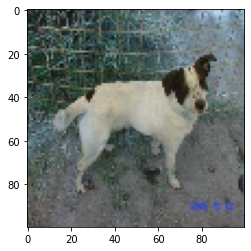

our model says it is a   dog


In [89]:
#making preductions - האם המודל צודק או טועה? המחשה.

ix = random.randint (0 , len (Y_test))
plt.imshow(X_test[ix].reshape( 100 ,100 , 3))
plt.show()


pred = [ 'cat' , 'dog']


print ("our model says it is a  " , pred[test_predict[ix]])

# DecisionTreeClassifier

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dec_tree_clf = DecisionTreeClassifier(max_depth=50, random_state=42)
dec_tree_clf.fit(X, Y)

DecisionTreeClassifier(max_depth=50, random_state=42)

In [87]:
#בדיקת תמונה אחת
one_train_predict = dec_tree_clf.predict(X[2].reshape(1, -1))

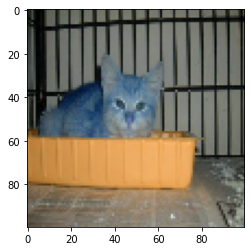

our model says it is a   cat


In [88]:
plt.imshow(X[2].reshape( 100 ,100 , 3))
plt.show()
print ("our model says it is a  " , pred[one_train_predict[0]])

In [91]:
# בדיקת הדיוק של המודל
test_predict2 = dec_tree_clf.predict(X_test)

accuracy = accuracy_score(Y_test , test_predict2)

print( "  Decision Tree Classifier accuracy:" , accuracy)

  DecisionTreeClassifier accuracy: 0.5531587057010786


# מודל נוסף 

In [410]:
# יצירת מודל:

model =  Sequential()

model.add(Conv2D (64 , (3,3) , activation = 'relu' , input_shape = (100,100,3)))

model.add(MaxPooling2D ((2,2)))

model.add(Flatten())

model.add (Dense(128 , input_shape = (100,100,3) , activation = 'relu'))

model.add (Dense(2 , activation = 'softmax'))

In [345]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [346]:
model.fit (X , Y , validation_split =0.1)

323/323 [==============================] - 2132s 7s/step - loss: 0.6908 - accuracy: 0.8069 - val_loss: 0.4418 - val_accuracy: 0.8014


In [394]:
model.evaluate(X_test , Y_test)

44/44 [==============================] - 90s 2s/step - loss: 0.6034 - accuracy: 0.6994


[0.6033984422683716, 0.6994261145591736]

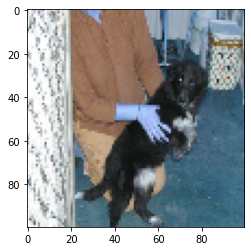

1/1 [==============================] - 0s 44ms/step
[ True False]
our model says it is a   dog


In [427]:
#making preductions - האם המודל צודק או טועה? המחשה.

ix = random.randint (0 , len (Y_test))
plt.imshow(X_test[ix , :])
plt.show()

y_pred = model.predict(X_test[ix , :].reshape(1 , 100 ,100 , 3))

y_pred = y_pred > 0.5
print(y_pred[0])

if (y_pred.any() ):
    pred = 'dog'
else:
     pred = 'cat'

print ("our model says it is a  " , pred)

In [392]:
Y_test = Y_test.reshape( len (Y_test ) , 1)
X_test = X_test.reshape( len(X_test) , 100 , 100 , 3)